<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/HyperparameterTuning_clustering_DriverDetails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift


In [6]:
drivers_df = pd.read_csv("/content/sample_data/driver_details.csv")
drivers_df.head()


,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:

drivers_df.shape

(4000, 3)

In [8]:
drivers_df[drivers_df.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


In [9]:
drivers_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
drivers_features = drivers_df.drop('Driver_ID', axis=1)

In [11]:
parameters = {'n_clusters': [2, 3, 4, 5, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)


In [12]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [21]:
best_score = -1
model = KMeans()

In [23]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
     best_score = ss
    best_grid = g


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 2} Score:  0.8490223286225532


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 3} Score:  0.8231396834167266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 4} Score:  0.5907475009381601


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 5} Score:  0.5123933606310196


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 10} Score:  0.4384149901360595


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 20} Score:  0.391785650188534


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter:  {'n_clusters': 30} Score:  0.3610033772792117


In [24]:
best_grid

{'n_clusters': 30}

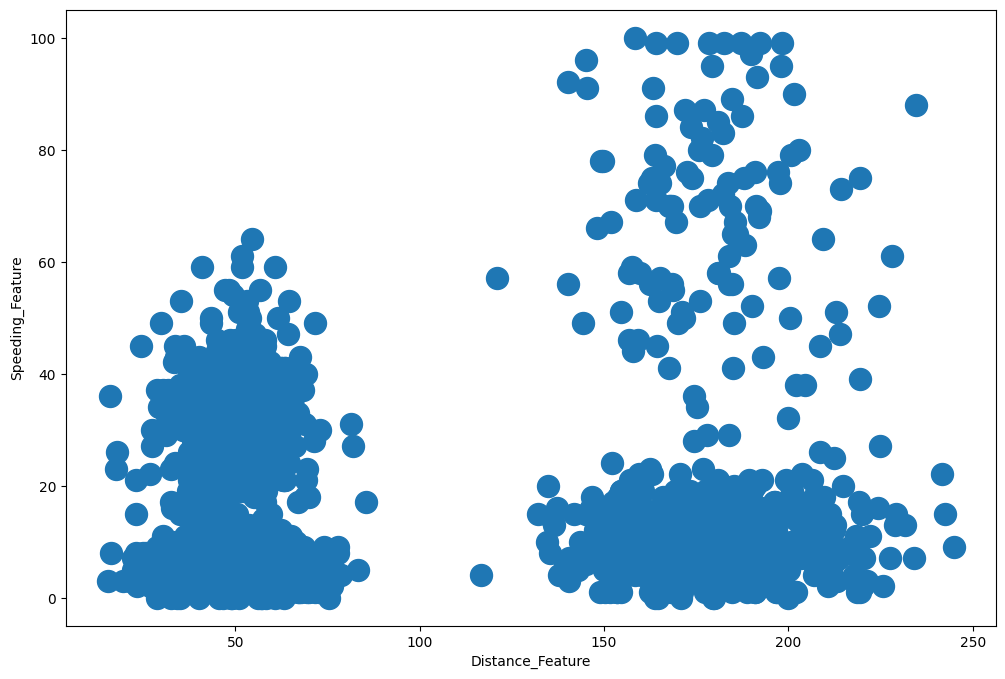

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(drivers_features['Distance_Feature'],
drivers_features['Speeding_Feature'], s=250)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()


### DBSCAN clustering

In [26]:
parameters = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
'min_samples': [5, 7, 10, 12]}

parameter_grid = ParameterGrid(parameters)
list(parameter_grid)


[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [27]:
model = DBSCAN()
best_score = -1

In [28]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
     best_score = ss
best_grid = g


Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [29]:
best_grid

{'eps': 20.0, 'min_samples': 12}

In [30]:
model.set_params(**best_grid)
model.fit(drivers_features)


DBSCAN(eps=20.0, min_samples=12)

In [31]:
len(model.labels_)

4000

In [32]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [33]:
n_noise = list(model.labels_).count(-1)
n_noise

2

In [34]:
another_grid = {'eps': 5.0, 'min_samples': 5}
model.set_params(**another_grid)
model.fit(drivers_features)
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)
n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)


Number of clusters:  7
Noisy points:  117


In [35]:
another_grid = {'eps': 5.0, 'min_samples': 7}
model.set_params(**another_grid)
model.fit(drivers_features)
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)
n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)


Number of clusters:  3
Noisy points:  157


### MeanShift clustering

In [38]:
https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/cluster/mean_shift_.py#L4

https://stats.stackexchange.com/questions/86324/name-of-algorithm-or-paper-that-scikit-learn-cluster-estimate-bandwidth-func"


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-38-59b95f3a5812>, line 3)

In [39]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_features)

33.960524729584314

In [40]:
model = MeanShift(bandwidth=estimate_bandwidth(drivers_features)).fit(drivers_features)
metrics.silhouette_score(drivers_features, model.labels_)

0.8231396834167266